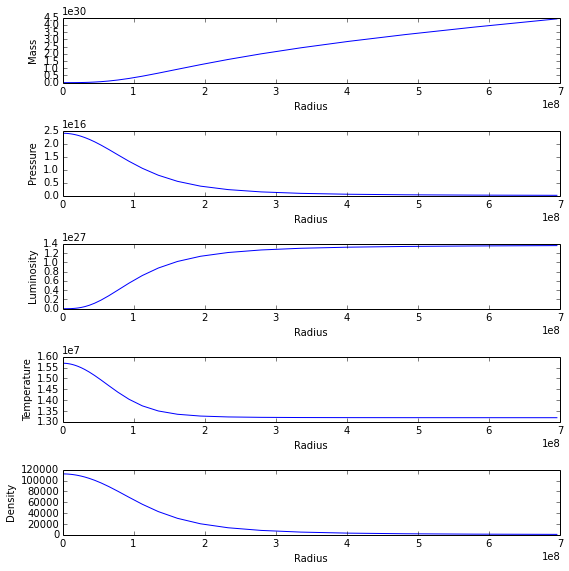

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

pi = 3.14159
G = 6.67e-11
a = 7.565e-16
c = 2.98e8
R = 1.38e-23/1.67382e-27
X = 0.7
Y = 0.28
Z = 0.02
Rsun= 6.957e8

def rho(y):
    M, P, L, T = y
    mu = 1/((2*X)+(0.75*Y)+(2*Z))
    return (((mu*a*(T**3))+(3*mu*P))/(3*R*T))

def epsilon(y):
    M, P, L, T = y
    e_pp0 = 1.08e-12
    e_cno0 = 8.24e-31
    X_H = 0.64
    X_cno = 0.015
    e_pp = e_pp0*rho(y)*(X_H**2)*((T/1e6)**4)
    e_cno = e_cno0*rho(y)*X_H*X_cno*((T/1e6)**19.9)
    return (e_pp+e_cno)

def kappa(y):
    M, P, L, T = y
    k_bf = 4.3e21*Z*(1+X)*(rho(y)/(T**3.5))*1e-1
    k_ff = 3.7e18*(1-Z)*(1+X)*(rho(y)/(T**3.5))*1e-1
    k_e = 0.20*(1+X)*1e-1
    return ((k_bf+k_ff+k_e)/3)

def dM_dr(y, r):
    M, P, L, T = y
    return (4*pi*(r**2)*rho(y))

def dP_dr(y, r):
    M, P, L, T = y
    return ((-G*M*rho(y))/(r**2))
   
def dL_dr(y, r):
    M, P, L, T = y
    return (4*pi*epsilon(y)*(r**2)*rho(y))

def dT_dr(y, r):
    M, P, L, T = y
    return ((-3*kappa(y)*rho(y)*L)/(16*a*c*pi*(T**3)*(r**2)))

M0 = 0.001
P0 = 2.4e16
L0 = 0
T0 = 1.57e7
y0 = [M0, P0, L0, T0]
    
def f(y, r):
    M, P, L, T = y
    d_dr = [dM_dr(y, r), dP_dr(y, r), dL_dr(y, r), dT_dr(y, r)]
    return d_dr
    
r = np.logspace(1.0, np.log10(Rsun), 100)
F = odeint(f, y0, r, mxstep=5000)

fig = plt.figure(1, figsize=(8,8))

pltM = fig.add_subplot(511)
pltM.plot(r, F[:,0])
pltM.set_xlabel("Radius")
pltM.set_ylabel("Mass")

pltP = fig.add_subplot(512)
pltP.plot(r, F[:,1])
pltP.set_xlabel("Radius")
pltP.set_ylabel("Pressure")

pltL = fig.add_subplot(513)
pltL.plot(r, F[:,2])
pltL.set_xlabel("Radius")
pltL.set_ylabel("Luminosity")

pltT = fig.add_subplot(514)
pltT.plot(r, F[:,3])
pltT.set_xlabel("Radius")
pltT.set_ylabel("Temperature")

rho0=rho
rhoS=np.zeros((len(F)))
for i in range(len(F)):
    rhoS[i] = rho(F[i, :])

pltR = fig.add_subplot(515)
pltR.plot(r, rhoS)
pltR.set_xlabel("Radius")
pltR.set_ylabel("Density")

plt.tight_layout()
plt.show()